# Hcup Data Analysis
## Import Required Libraries 


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import numpy as np
from pandas import DataFrame
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Import Required datasets

In [2]:
df = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_Core-2.csv')

/var/folders/gc/lkpz0pfn6kld0n_4q1tbvz_m0000gn/T/ipykernel_41144/1859451998.py:1: DtypeWarning: Columns (6,8,13,14,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,92,95,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_Core-2.csv')


In [6]:
df_hosp = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_Hospital.csv')

In [5]:
df_sev = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_Severity.csv')

In [7]:
df_die = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_DX_PR_GRPS.csv')

/var/folders/gc/lkpz0pfn6kld0n_4q1tbvz_m0000gn/T/ipykernel_41144/628182034.py:1: DtypeWarning: Columns (544,545,546,547,548,549,550,551,552,553,554,555,556,561,562,563) have mixed types. Specify dtype option on import or set low_memory=False.
  df_die = pd.read_csv(r'/Users/shravanthkumarkulkarni/Downloads/Capstone/KID_2019_DX_PR_GRPS.csv')


Merging Required Columns from different tables 

In [8]:
merged_df = pd.merge(df, df_hosp[['HOSP_KID', 'HOSP_BEDSIZE']], on='HOSP_KID', how='left')

In [9]:
merged_df = pd.merge(merged_df, df_sev[['RECNUM','APRDRG_Risk_Mortality', 'APRDRG_Severity']], on='RECNUM', how='left')

In [10]:
merged_df.head()

,HOSP_KID,RECNUM,AGE,AGE_NEONATE,AMONTH,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DQTR,...,PRDAY25,RACE,TOTCHG,TRAN_IN,TRAN_OUT,YEAR,ZIPINC_QRTL,HOSP_BEDSIZE,APRDRG_Risk_Mortality,APRDRG_Severity
0,10001,10000281,19,NaN,NaN,0.0,0,1.2783,1,1.0,...,NaN,1.0,18443,0.0,0.0,2019,1.0,1,2,2
1,10001,10012991,18,NaN,NaN,0.0,0,1.2783,1,1.0,...,NaN,1.0,76274,0.0,0.0,2019,2.0,1,1,1
2,10001,10070000,19,NaN,NaN,0.0,0,1.2783,1,1.0,...,NaN,1.0,53728,0.0,0.0,2019,2.0,1,4,4
3,10001,10091342,17,NaN,NaN,0.0,0,1.2783,1,2.0,...,NaN,1.0,52941,1.0,0.0,2019,3.0,1,1,1
4,10001,10193871,20,NaN,NaN,0.0,0,1.2783,1,4.0,...,NaN,1.0,15918,0.0,0.0,2019,3.0,1,2,2


In [12]:
merged_df1 = pd.merge(merged_df, df_die[['RECNUM','DXCCSR_Default_DX1']], on='RECNUM', how='left')

In [13]:
merged_df1.head()

,HOSP_KID,RECNUM,AGE,AGE_NEONATE,AMONTH,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DQTR,...,RACE,TOTCHG,TRAN_IN,TRAN_OUT,YEAR,ZIPINC_QRTL,HOSP_BEDSIZE,APRDRG_Risk_Mortality,APRDRG_Severity,DXCCSR_Default_DX1
0,10001,10000281,19,NaN,NaN,0.0,0,1.2783,1,1.0,...,1.0,18443,0.0,0.0,2019,1.0,1,2,2,DIG022
1,10001,10012991,18,NaN,NaN,0.0,0,1.2783,1,1.0,...,1.0,76274,0.0,0.0,2019,2.0,1,1,1,DIG011
2,10001,10070000,19,NaN,NaN,0.0,0,1.2783,1,1.0,...,1.0,53728,0.0,0.0,2019,2.0,1,4,4,INJ026
3,10001,10091342,17,NaN,NaN,0.0,0,1.2783,1,2.0,...,1.0,52941,1.0,0.0,2019,3.0,1,1,1,DIG009
4,10001,10193871,20,NaN,NaN,0.0,0,1.2783,1,4.0,...,1.0,15918,0.0,0.0,2019,3.0,1,2,2,INF002


In [14]:
merged_df1.shape

(3089283, 133)

In [15]:
Imp_features = merged_df1[['HOSP_KID', 'RECNUM','HOSP_REGION','AGE', 'FEMALE', 'LOS', 'PAY1', 'TOTCHG', 'RACE', 'ZIPINC_QRTL','HOSP_BEDSIZE','APRDRG_Risk_Mortality','APRDRG_Severity','DXCCSR_Default_DX1']]


In [16]:
Imp_features.head()

,HOSP_KID,RECNUM,HOSP_REGION,AGE,FEMALE,LOS,PAY1,TOTCHG,RACE,ZIPINC_QRTL,HOSP_BEDSIZE,APRDRG_Risk_Mortality,APRDRG_Severity,DXCCSR_Default_DX1
0,10001,10000281,1,19,1,1,2,18443,1.0,1.0,1,2,2,DIG022
1,10001,10012991,1,18,1,5,3,76274,1.0,2.0,1,1,1,DIG011
2,10001,10070000,1,19,0,4,2,53728,1.0,2.0,1,4,4,INJ026
3,10001,10091342,1,17,0,3,2,52941,1.0,3.0,1,1,1,DIG009
4,10001,10193871,1,20,0,1,3,15918,1.0,3.0,1,2,2,INF002


In [17]:
Imp_features.shape

(3089283, 14)

Number of records for top 10 diseases 

In [18]:
code_counts = Imp_features['DXCCSR_Default_DX1'].value_counts().reset_index()
code_counts.columns = ['DXCCSR_Default_DX1', 'Count']
# Sort the codes by count in descending order
code_counts = code_counts.sort_values(by='Count', ascending=False)
# Print the top 10 codes
top_10_codes = code_counts.head(10)
print(top_10_codes)

  DXCCSR_Default_DX1    Count
0             PNL001  1374135
1             MBD002   102736
2             RSP005    81030
3             PRG023    55475
4             NVS009    54666
5             RSP009    52611
6             RSP002    51176
7             RSP012    45024
8             END003    36869
9             DIG009    36100


Considering Top 6 Diagnosis excluding birth of child and pregnancy complications 

In [19]:
# List of specific codes you want to extract
specific_codes = ['MBD002', 'RSP005', 'RSP009', 'NVS009', 'RSP002', 'RSP012']
# Filter the data to include only the specific codes
Top6 = Imp_features[Imp_features['DXCCSR_Default_DX1'].isin(specific_codes)]

In [22]:
# Making copy of a dataframe
data=Top6.copy()

In [23]:
data.dtypes

HOSP_KID                  int64
RECNUM                    int64
HOSP_REGION               int64
AGE                       int64
FEMALE                   object
LOS                      object
PAY1                     object
TOTCHG                   object
RACE                     object
ZIPINC_QRTL              object
HOSP_BEDSIZE              int64
APRDRG_Risk_Mortality     int64
APRDRG_Severity           int64
DXCCSR_Default_DX1       object
dtype: object

Dropped total charges which is having null


In [25]:
data = data[pd.to_numeric(data['TOTCHG'], errors='coerce').notna()]

Converting Datatypes into Int

In [27]:
data['TOTCHG'] = data['TOTCHG'].apply(lambda x: int(float(x)) if str(x).isdigit() else 0)
data['TOTCHG'] = data['TOTCHG'].astype(int)

In [28]:
data['LOS'] = data['LOS'].apply(lambda x: int(float(x)) if str(x).isdigit() else 0)
data['LOS'] = data['LOS'].astype(int)

Correlation Matrix
considering Important numerical Features 


In [30]:
# Calculate the correlation matrix
correlation_matrix = data[['TOTCHG','AGE','LOS','APRDRG_Risk_Mortality','APRDRG_Severity']].corr()

# Display the correlation matrix
print(correlation_matrix)

                         TOTCHG       AGE       LOS  APRDRG_Risk_Mortality  \
TOTCHG                 1.000000 -0.035888  0.624047               0.263869   
AGE                   -0.035888  1.000000  0.088711              -0.114829   
LOS                    0.624047  0.088711  1.000000               0.214749   
APRDRG_Risk_Mortality  0.263869 -0.114829  0.214749               1.000000   
APRDRG_Severity        0.229842 -0.152456  0.210244               0.710145   

                       APRDRG_Severity  
TOTCHG                        0.229842  
AGE                          -0.152456  
LOS                           0.210244  
APRDRG_Risk_Mortality         0.710145  
APRDRG_Severity               1.000000  


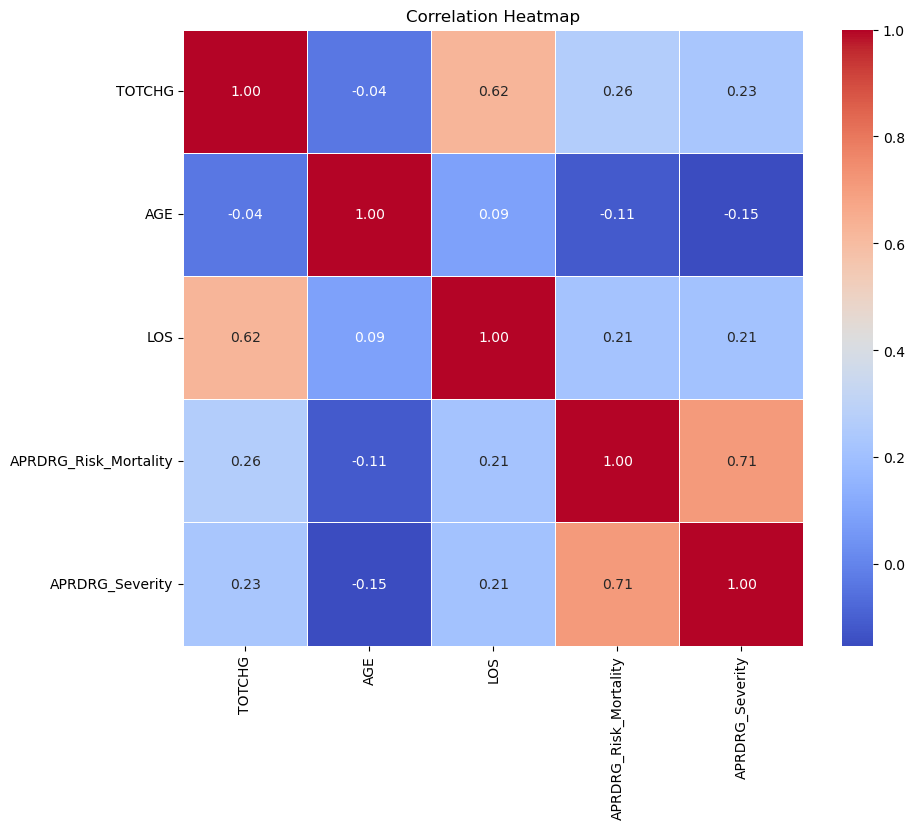

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

We can see LOS is strongly correlating to Total Charges and mortality rates are correlating to severity rates  

In [34]:
data['PAY1'] = data['PAY1'].apply(lambda x: int(float(x)) if str(x).isdigit() else 0)
data['PAY1'] = data['PAY1'].astype(int)

In [35]:
data['ZIPINC_QRTL'] = data['ZIPINC_QRTL'].apply(lambda x: int(float(x)) if str(x).isdigit() else 0)
data['ZIPINC_QRTL'] = data['ZIPINC_QRTL'].astype(int)

Changing the PAY1 insurance type with names

In [39]:
# Define the mapping
insurance_mapping = {
    1: "Medicare",
    2: "Medicaid",
    3: "Private insurance",
    4: "Self-pay",
    5: "No charge",
    6: "Other"
}

# Create a new column 'Insurancetype' 
data['Insurancetype'] = data['PAY1'].map(insurance_mapping)

Chi-Squared test for Categorical variables ('Insurancetype' and 'ZIPINC_QRTL')


With a p-value of 0.0000, which is less than the common significance level of 0.05, you would typically reject the null hypothesis. This suggests that there is a significant association between 'Insurancetype' and 'ZIPINC_QRTL'.The two variables are not independent, and there is evidence of a relationship between the type of insurance and the income quartile.

Chi-Square Statistic: 3266.9409
p-value: 0.0000


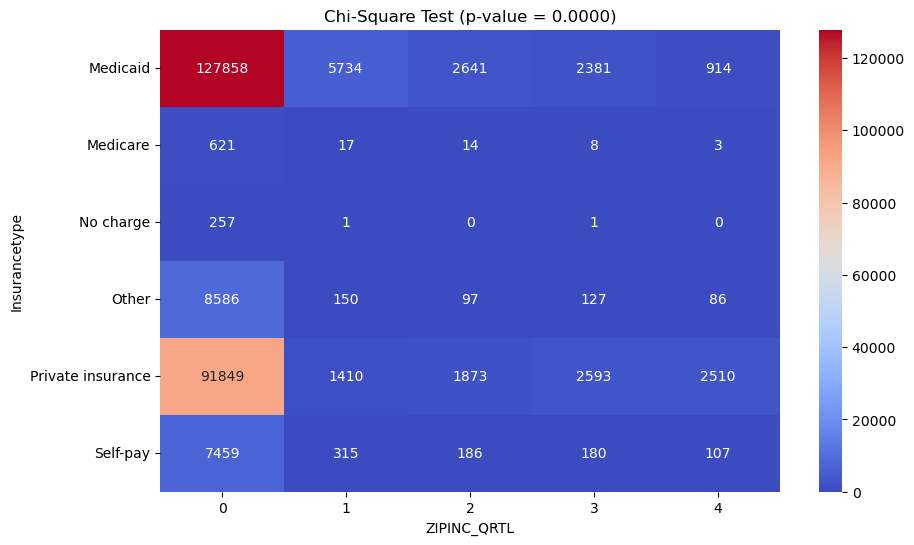

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Insurancetype'], data['ZIPINC_QRTL'])
# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
# Adding labels and title
plt.xlabel('ZIPINC_QRTL')
plt.ylabel('Insurancetype')
plt.title(f'Chi-Square Test (p-value = {p:.4f})')
# Print the chi-square statistic and p-value
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')
# Show the plot
plt.show()

Changing Diseases from code to diagnosis name

In [42]:
code_mapping = {
    'MBD002': 'MOOD DISORDERS',
    'NVS009': 'EPILEPSY CONVULSIONS',
    'RSP002': 'BACTERIAL INFECTION',
    'RSP005': 'ACUTE BRONCHITIS',
    'RSP009': 'ASTHMA',
    'RSP012': 'RESPIRATORY FAILURE'
}

# Create a new column based on the mapping
data['Description'] = data['DXCCSR_Default_DX1'].map(code_mapping)

CHI SQUARE TEST('AGE','Desription')

With a p-value of 0.0000, which is less than the common significance level of 0.05, you would typically reject the null hypothesis. This suggests that there is a significant association between 'AGE' and 'Description'. In other words, the two variables are not independent, and there is evidence of a relationship between age and the categories within the 'Description' variable.

Chi-Square Statistic: 364045.0352
p-value: 0.0000


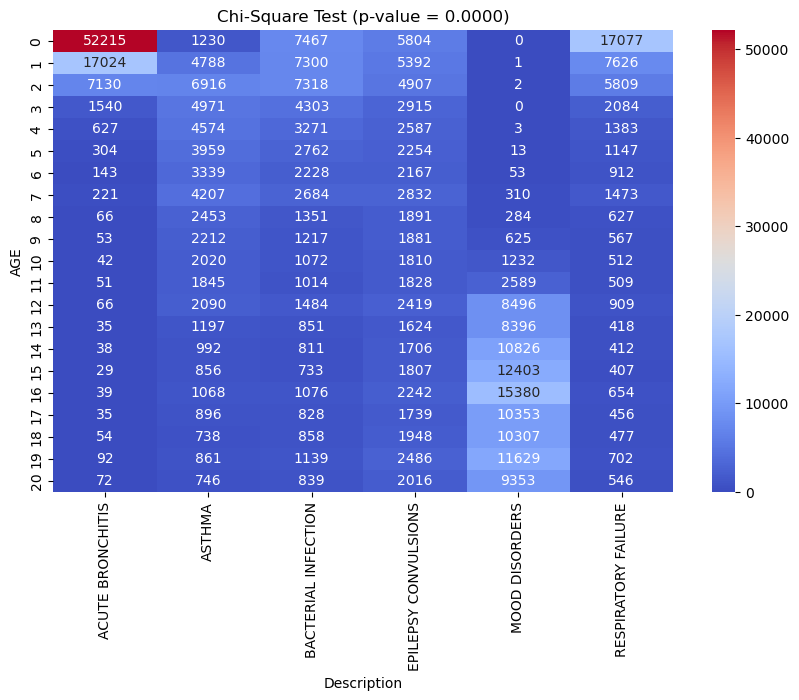

In [44]:
#  'AGE' and 'Diseases'
contingency_table = pd.crosstab(data['AGE'], data['Description'])
# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
# Adding labels and title
plt.ylabel('AGE')
plt.xlabel('Description')
plt.title(f'Chi-Square Test (p-value = {p:.4f})')
# Print the chi-square statistic and p-value
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')
# Show the plot
plt.show()

CHI-SQUARE TEST('HOSP_REGION','Description')

The low p-value indicates that the association between 'HOSP_REGION' and 'Description' is unlikely to be due to random chance alone. Therefore, you might conclude that there is a significant relationship between age and the categories within the 'Description' variable.

Chi-Square Statistic: 16048.0108
p-value: 0.0000


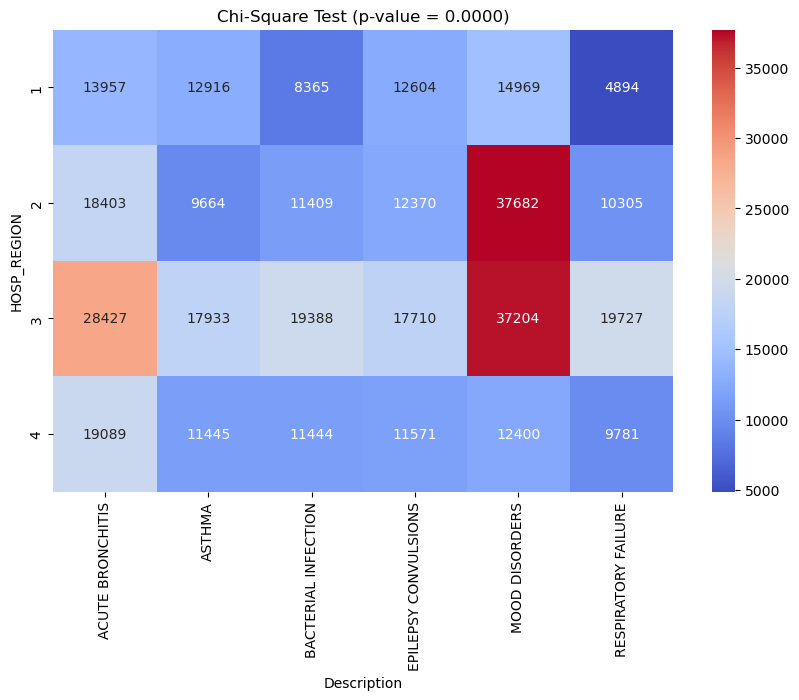

In [45]:
#  'Hospital_region' and 'Diseases'
contingency_table = pd.crosstab(data['HOSP_REGION'], data['Description'])

# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')

# Adding labels and title
plt.ylabel('HOSP_REGION')
plt.xlabel('Description')
plt.title(f'Chi-Square Test (p-value = {p:.4f})')

# Print the chi-square statistic and p-value
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')

# Show the plot
plt.show()

Changing categorical of RACE with Names

In [46]:
# Define the mapping dictionary
category_mapping = {
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian or Pacific Islander",
    5: "Native American",
    6: "Other",
    7: "Other"  # Default case for "Other"
}

# Create a new 'Category'
data['RACE_1'] = data['RACE'].map(category_mapping)

CHI-SQUARE('RACE','Description')

The low p-value indicates that the association between 'RACE' and 'Description' is unlikely to be due to random chance alone. Therefore, you might conclude that there is a significant relationship between age and the categories within the 'Description' variable.

Chi-Square Statistic: 20886.0103
p-value: 0.0000


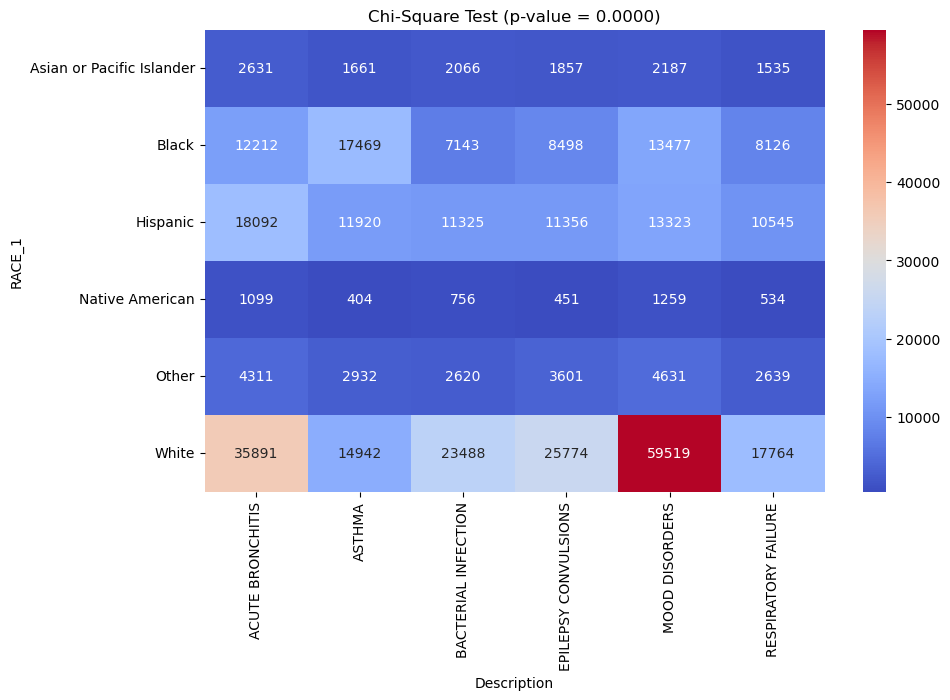

In [47]:
contingency_table = pd.crosstab(data['RACE_1'], data['Description'])

# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')

# Adding labels and title
plt.ylabel('RACE_1')
plt.xlabel('Description')
plt.title(f'Chi-Square Test (p-value = {p:.4f})')

# Print the chi-square statistic and p-value
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')

# Show the plot
plt.show()

Changing Gender to names from 0 and 1

In [48]:
data['Gender'] = np.where(data['FEMALE'] == 0, 'Male', 'Female')

CHI-SQUARE ('Gender','Description')

With a p-value of 0.0000, which is less than the common significance level of 0.05, you would typically reject the null hypothesis. This suggests that there is a significant association between 'GENDER' and 'Description'. In other words, the two variables are not independent, and there is evidence of a relationship between Gender and the categories within the 'Description' variable

Chi-Square Statistic: 12499.2012
p-value: 0.0000


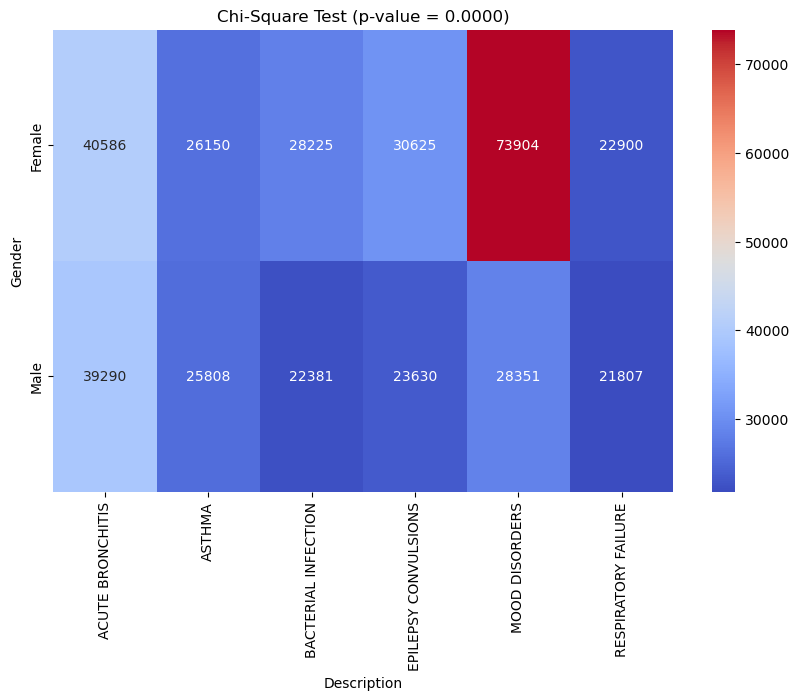

In [49]:
contingency_table = pd.crosstab(data['Gender'], data['Description'])
# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')

# Adding labels and title
plt.ylabel('Gender')
plt.xlabel('Description')
plt.title(f'Chi-Square Test (p-value = {p:.4f})')

# Print the chi-square statistic and p-value
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')

# Show the plot
plt.show()

## K-Means Clustering 


In [60]:
data.dtypes

HOSP_KID                  int64
RECNUM                    int64
HOSP_REGION               int64
AGE                       int64
FEMALE                   object
LOS                       int64
PAY1                      int64
TOTCHG                    int64
RACE                     object
ZIPINC_QRTL               int64
HOSP_BEDSIZE              int64
APRDRG_Risk_Mortality     int64
APRDRG_Severity           int64
DXCCSR_Default_DX1       object
Insurancetype            object
Description              object
RACE_1                   object
Gender                   object
dtype: object

Labelencoding for categorical varibale to perform clustering

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['ZIPINC_QRTL'] = label_encoder.fit_transform(data['ZIPINC_QRTL'])

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['HOSP_BEDSIZE'] = label_encoder.fit_transform(data['HOSP_BEDSIZE'])

In [64]:
data = pd.get_dummies(data, columns=['RACE_1'], prefix='Category')

In [65]:
data = pd.get_dummies(data, columns=['Description'], prefix='Ins')

In [66]:
data = pd.get_dummies(data, columns=['Insurancetype'], prefix='Insurance')

In [67]:
data = pd.get_dummies(data, columns=['Gender'], prefix='Sex')

In [71]:
data

<bound method NDFrame.head of          HOSP_KID    RECNUM  HOSP_REGION  AGE FEMALE  LOS  PAY1  TOTCHG RACE  \
25          10002  10930013            1   20      1    2     3   35073  2.0   
30          10003  10151557            1   19      1    1     2    5818  6.0   
32          10003  10234538            1   19      0    3     3    7204  1.0   
36          10003  10369361            1   20      1    6     3   10491  1.0   
38          10003  10390878            1   18      1    4     3    7112  1.0   
...           ...       ...          ...  ...    ...  ...   ...     ...  ...   
3089219     40938  40877467            4    6      0    2     3   16903  1.0   
3089224     40938  40925230            4   18      1    3     3   18871  1.0   
3089226     40938  40976558            4    4      0    1     3   10166  1.0   
3089232     40938  41011598            4    0      1    1     3    4176  1.0   
3089261     40938  41218747            4    1      1    3     3   15593  1.0   

         

Excluding features which are not significant for clustering

In [73]:
columns_to_exclude = ['HOSP_KID','RECNUM', 'HOSP_REGION', 'FEMALE','PAY1','RACE','DXCCSR_Default_DX1']
df_for_clustering = data.drop(columns=columns_to_exclude)

K-MEANS CLUSTERING

In [77]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_for_clustering)

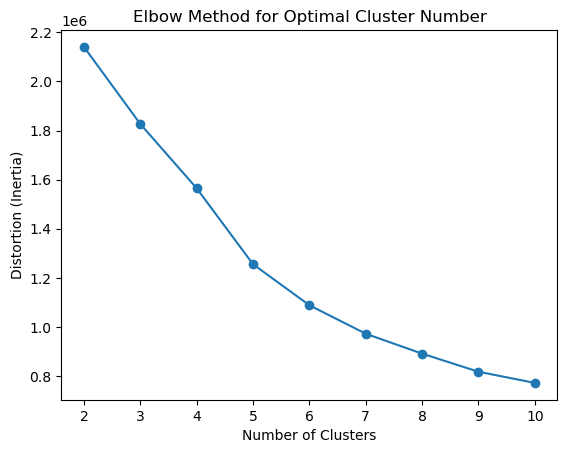

In [78]:
# Specify a range of cluster numbers to consider
min_clusters = 2
max_clusters = 10  # You can adjust this range based on your dataset and problem

# Initialize lists to store distortion/inertia values
distortions = []

# Calculate distortion for a range of cluster numbers
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the distortion values for different cluster numbers
plt.plot(range(min_clusters, max_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

We took the sharp decline in elbow curve that is 5 

In [79]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster'] = clusters

In [80]:
csv_file_path = '/Users/shravanthkumarkulkarni/Downloads/Capstone/Kmeans.csv'

# Write the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)